In [1]:
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#read trajectories from folder bags

nop = 39
trajectories = []
progresses = []
steps = []
scalars = []
ind = []

for i in range(nop):
    #print(i)
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "bags/user_"+str(i)+"/0_poses.txt"
    step_path = "bags/user_"+str(i)+"/0_step.txt"
    progress_path = "bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))

34
34
34
34


info:  90 26
info:  10 52
info:  30 78
info:  30 104
info:  80 130
info:  90 156
info:  91 182
info:  94 208
info:  96 234
info:  98 262
info:  20 51
info:  30 102
info:  30 153
info:  30 204
info:  50 255
info:  60 306
info:  60 357
info:  95 408
info:  99 459
info:  100 511
info:  10 31
info:  100 62
info:  100 93
info:  100 124
info:  100 155
info:  70 186
info:  80 217
info:  98 248
info:  100 279
info:  100 312
info:  30 19
info:  40 38
info:  50 57
info:  60 76
info:  75 95
info:  85 114
info:  85 133
info:  90 152
info:  80 171
info:  80 197
info:  10 45
info:  40 90
info:  45 135
info:  50 180
info:  51 225
info:  80 270
info:  85 315
info:  86 360
info:  95 405
info:  100 459
info:  30 26
info:  45 52
info:  50 78
info:  60 104
info:  70 130
info:  90 156
info:  90 182
info:  93 208
info:  100 234
info:  100 260
info:  20 19
info:  40 38
info:  45 57
info:  47 76
info:  50 95
info:  60 114
info:  80 133
info:  85 152
info:  90 171
info:  100 191
info:  30 30
info:  40 60
info:

/tmp/ipykernel_1493915/1359927650.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(16, 4))


info:  90 352
info:  93 396
info:  100 442
info:  10 41
info:  30 82
info:  40 123
info:  50 164
info:  55 205
info:  60 246
info:  63 287
info:  65 328
info:  70 369
info:  100 415
info:  20 83
info:  40 166
info:  40 249
info:  50 332
info:  40 415
info:  70 498
info:  80 581
info:  90 664
info:  95 747
info:  100 830
info:  10 26
info:  30 52
info:  35 78
info:  40 104
info:  50 130
info:  55 156
info:  55 182
info:  60 208
info:  80 234
info:  80 261
info:  100 41
info:  90 82
info:  100 123
info:  100 164
info:  100 205
info:  100 246
info:  100 287
info:  100 328
info:  100 369
info:  100 411
info:  5 41
info:  25 82
info:  60 123
info:  60 164
info:  60 205
info:  67 246
info:  75 287
info:  80 328
info:  75 369
info:  75 416
info:  40 161
info:  60 322
info:  70 483
info:  60 644
info:  0 805
info:  20 966
info:  30 1127
info:  75 1288
info:  95 1449
info:  95 1611
info:  5 52
info:  50 104
info:  55 156
info:  60 208
info:  70 260
info:  80 312
info:  85 364
info:  90 416
info

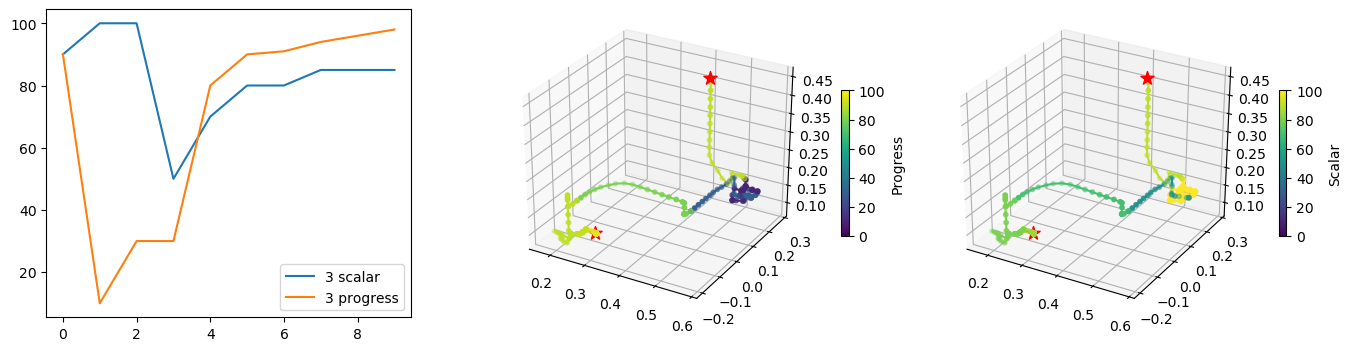

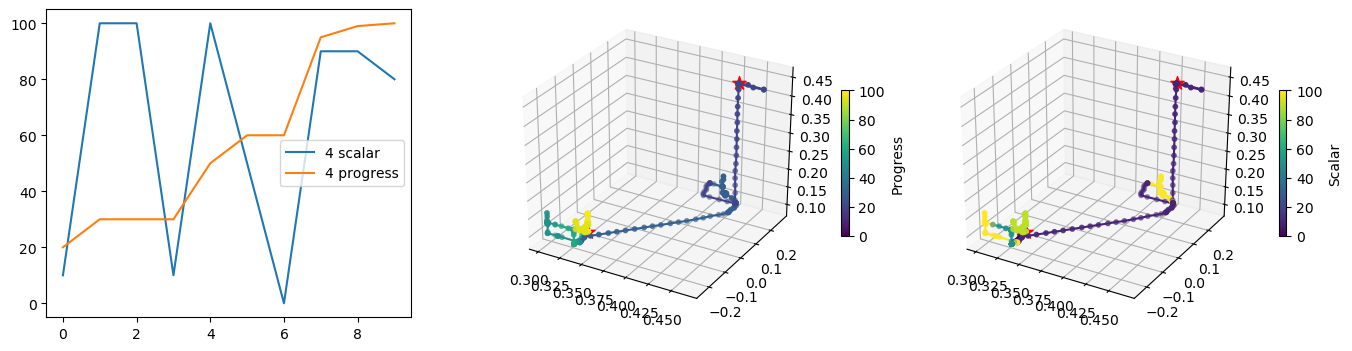

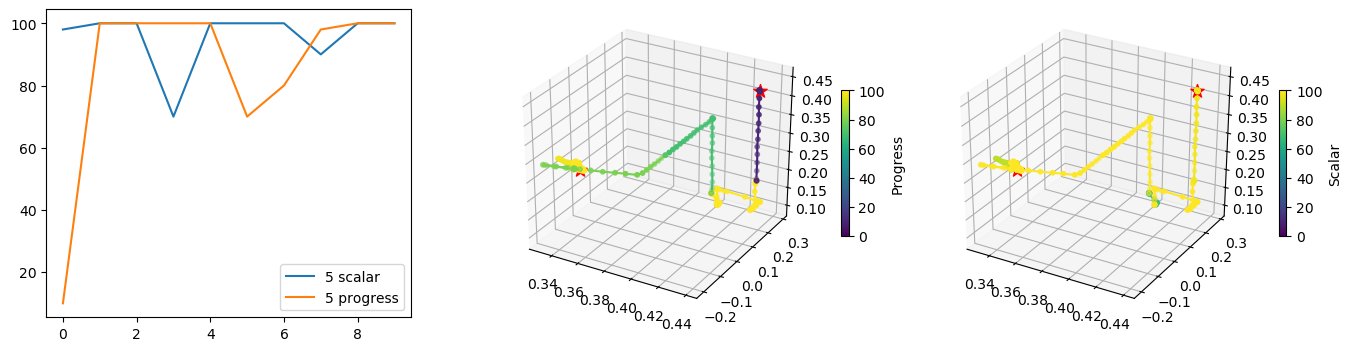

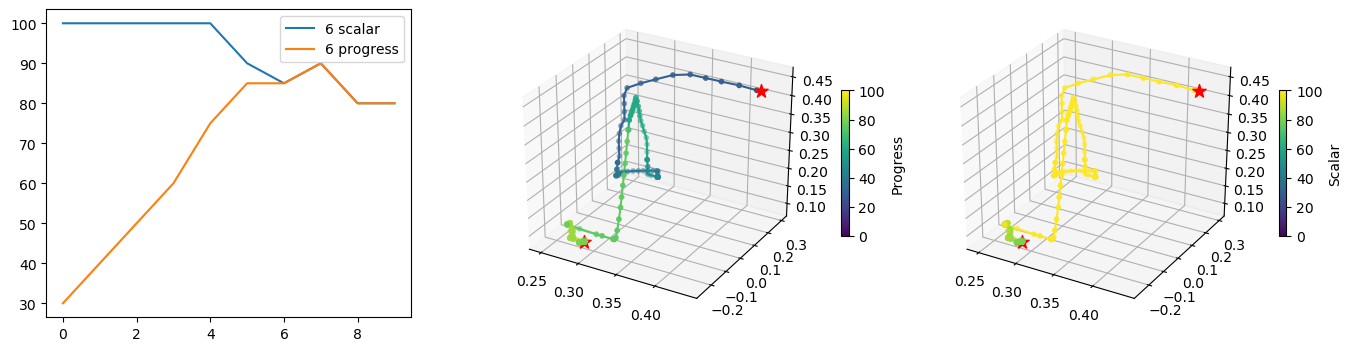

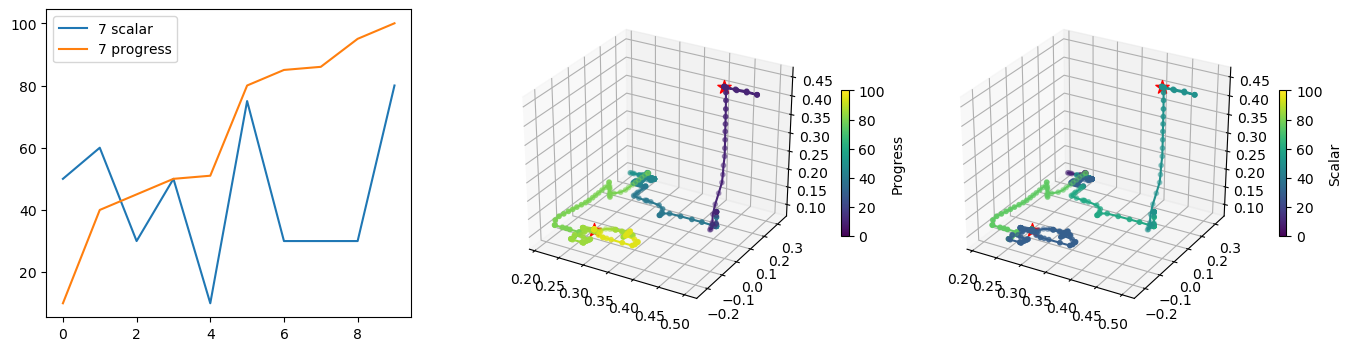

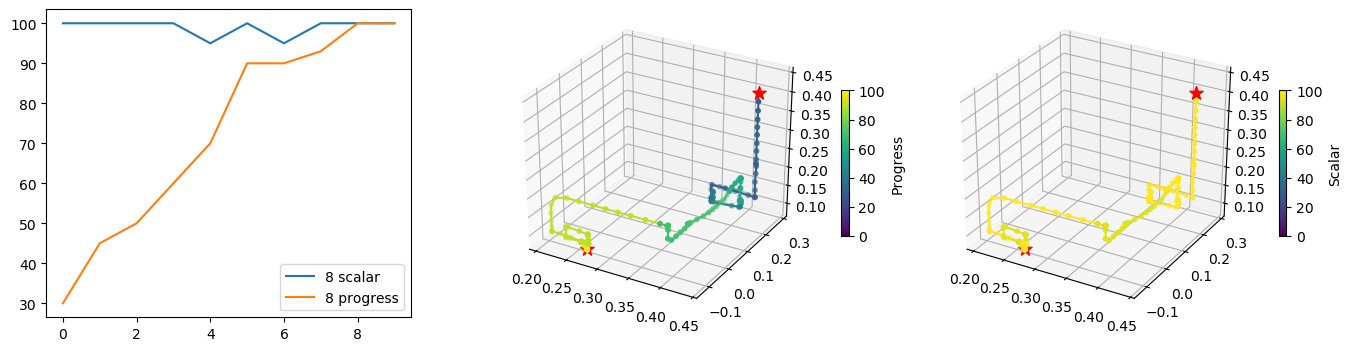

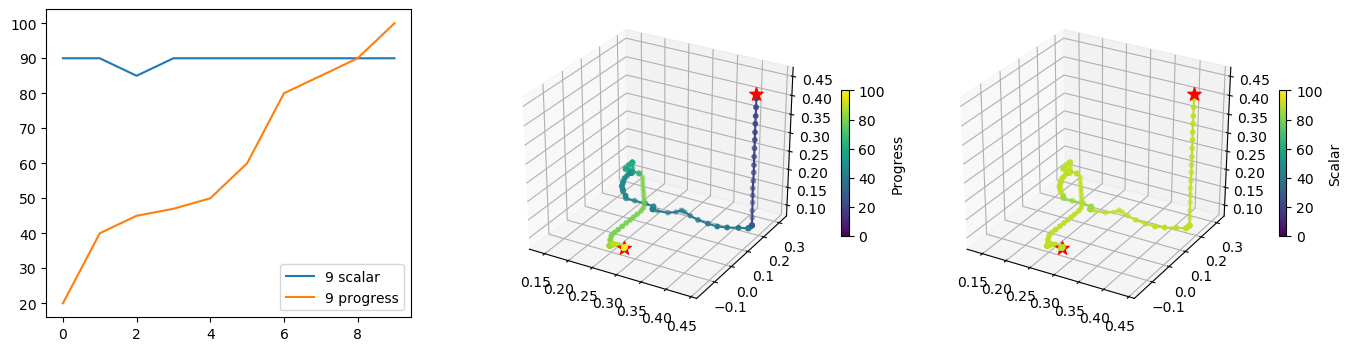

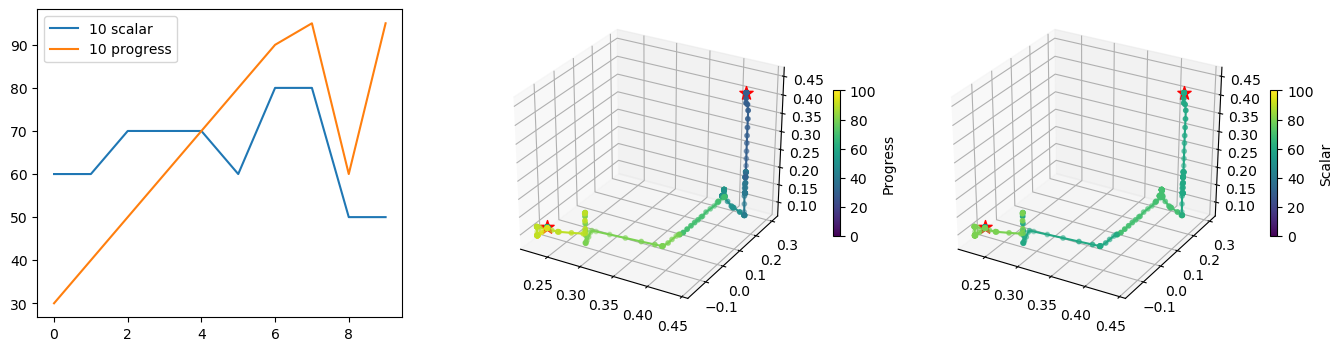

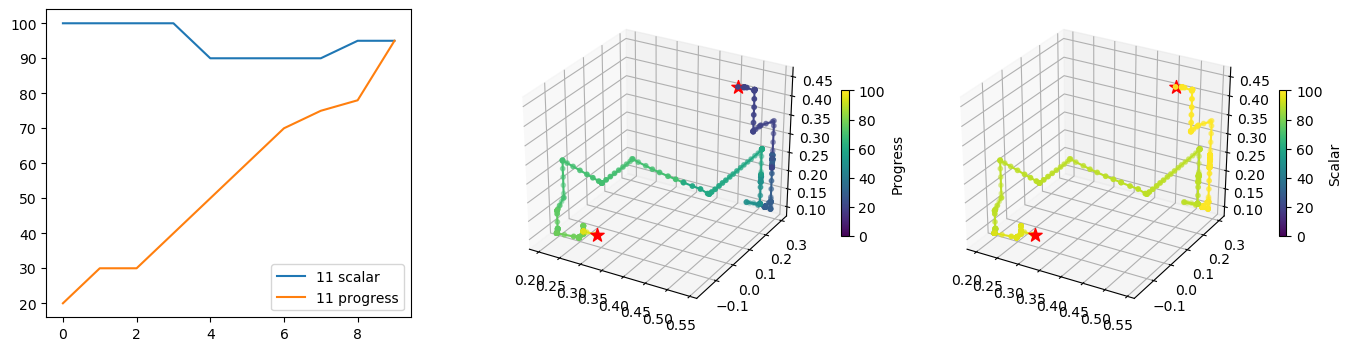

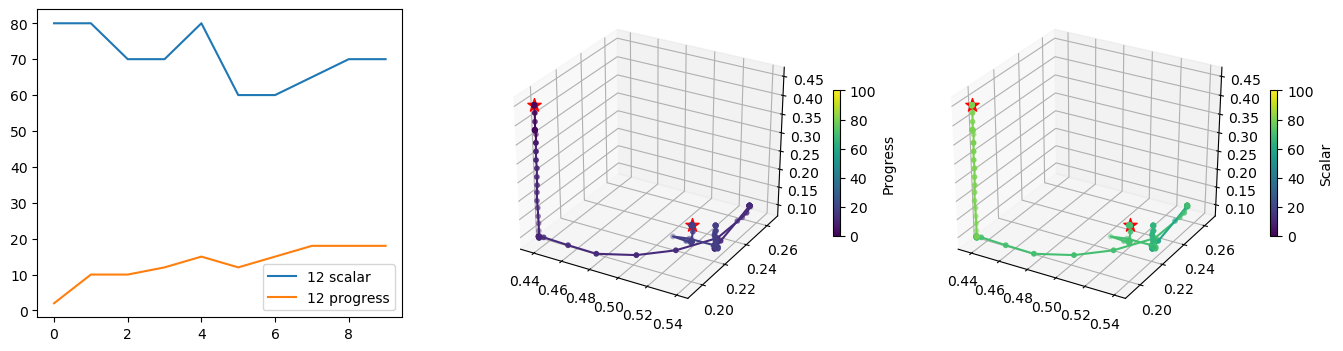

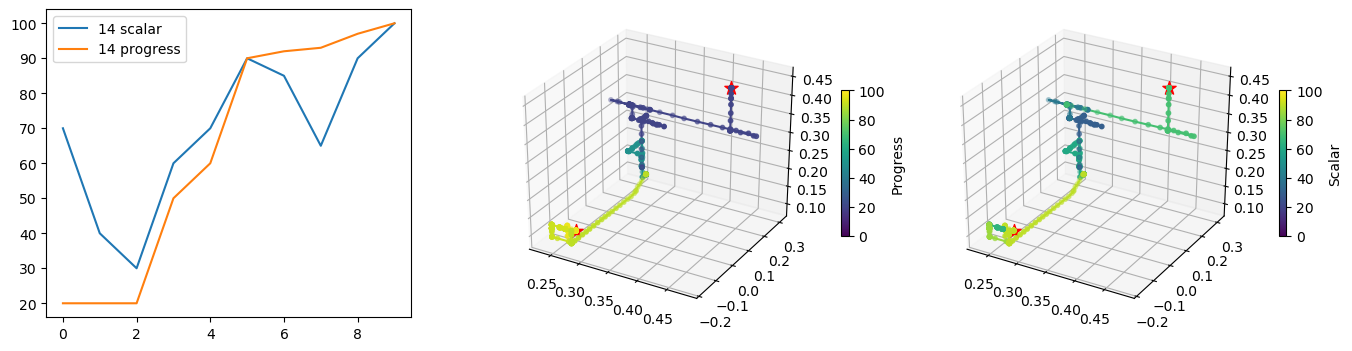

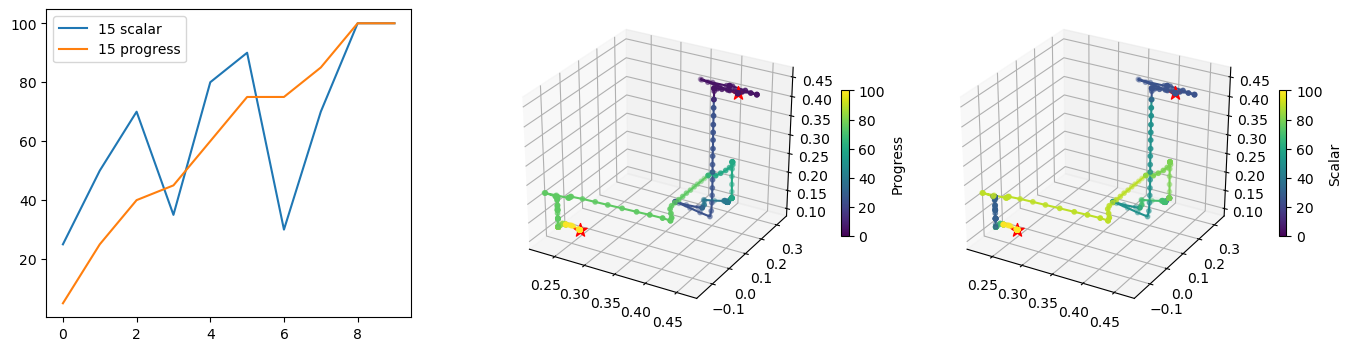

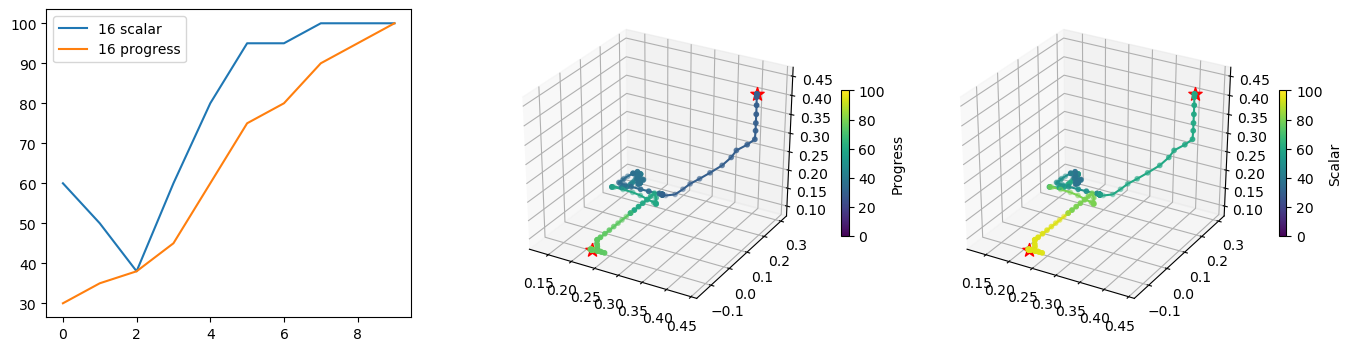

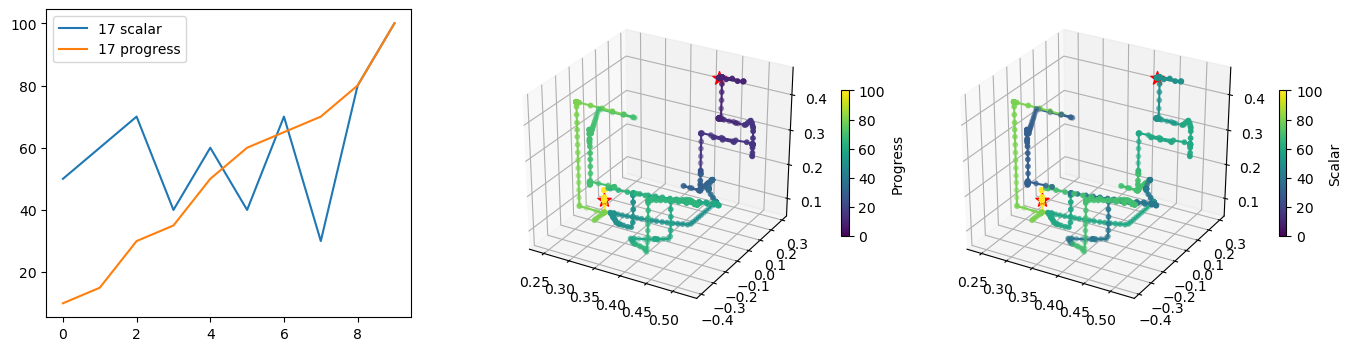

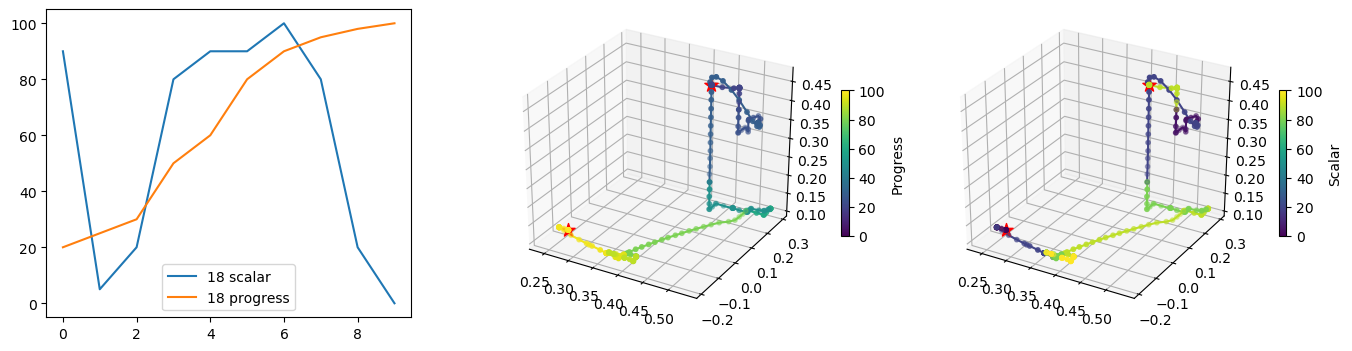

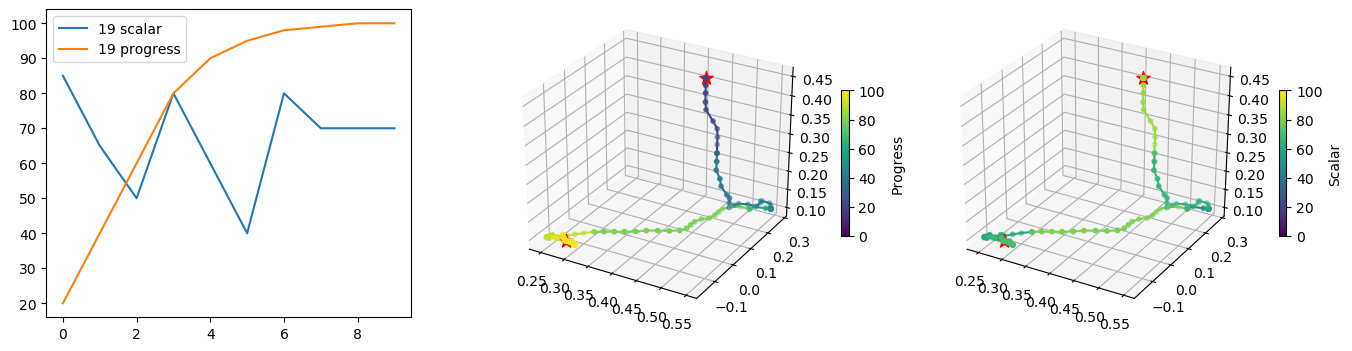

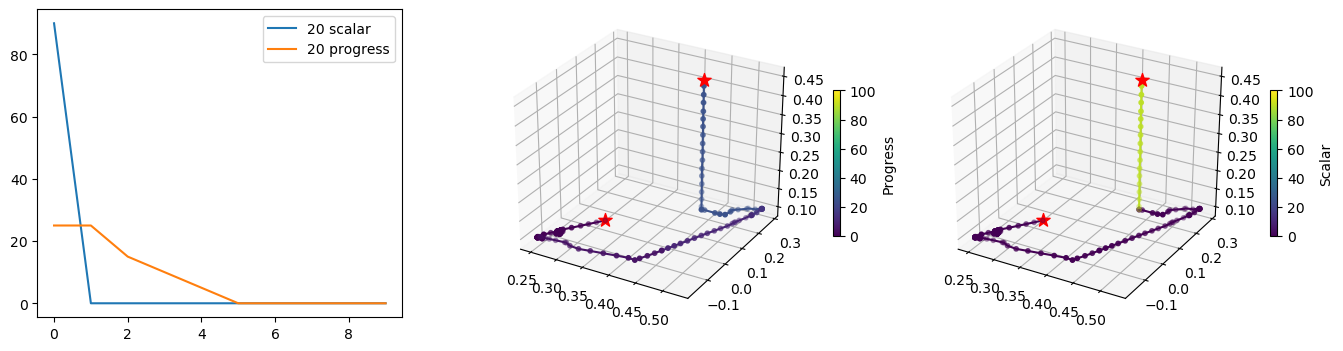

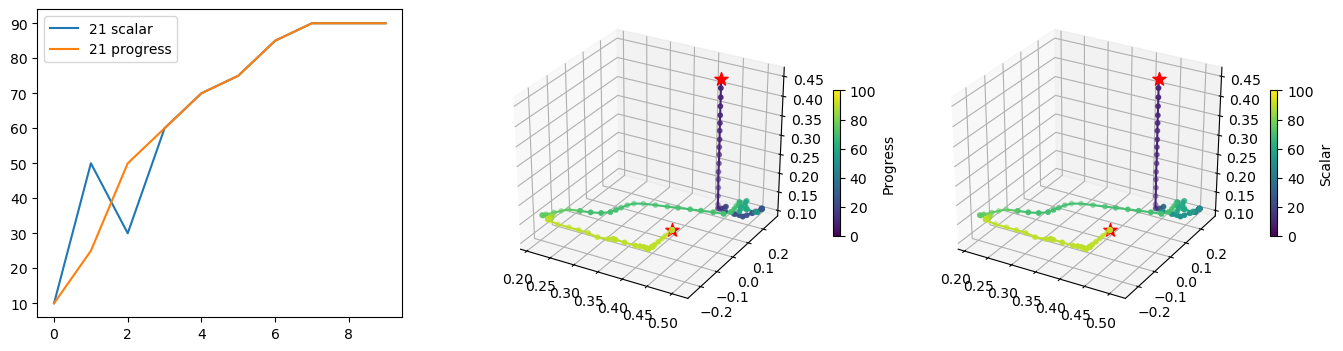

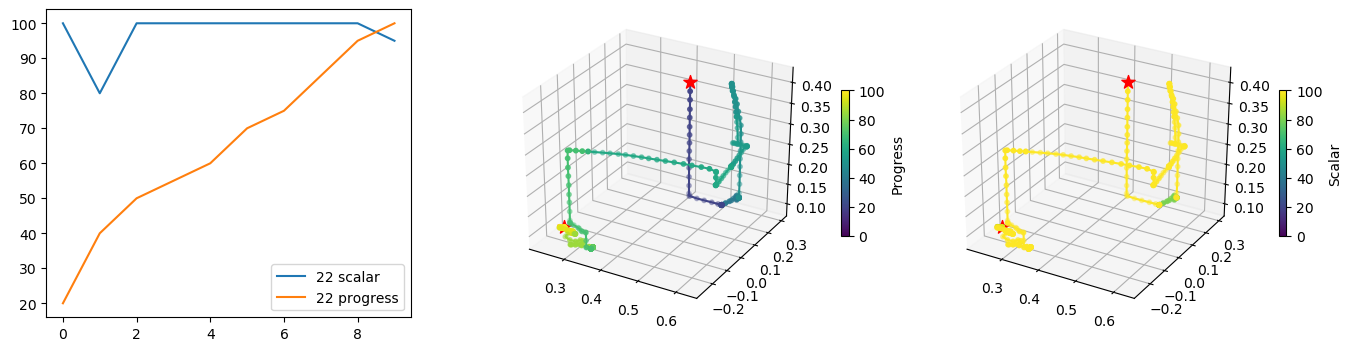

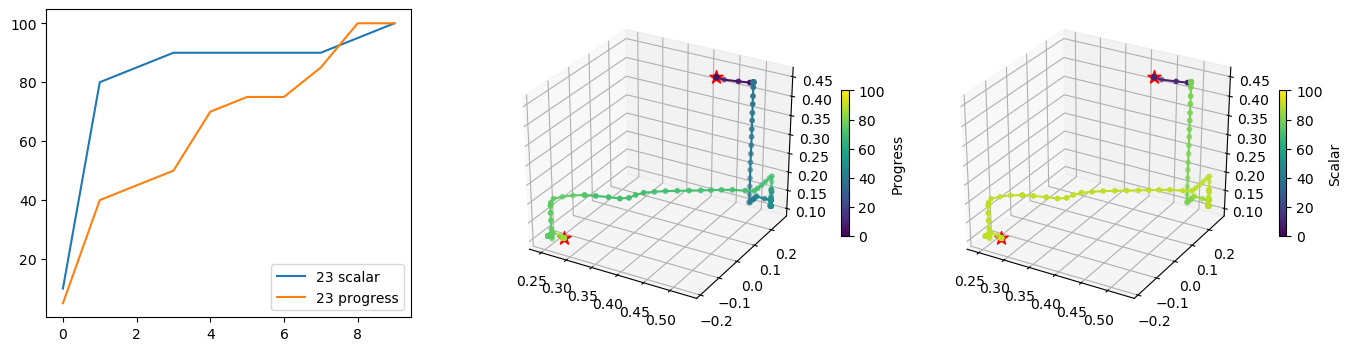

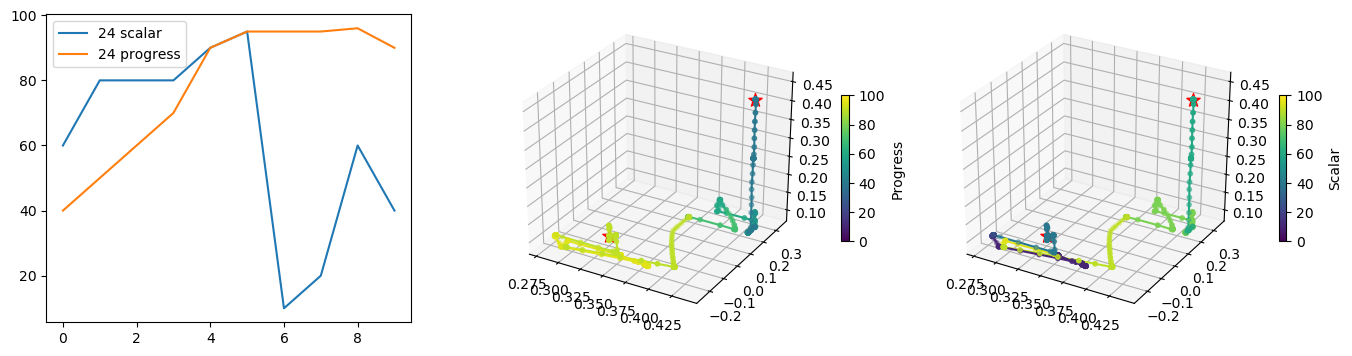

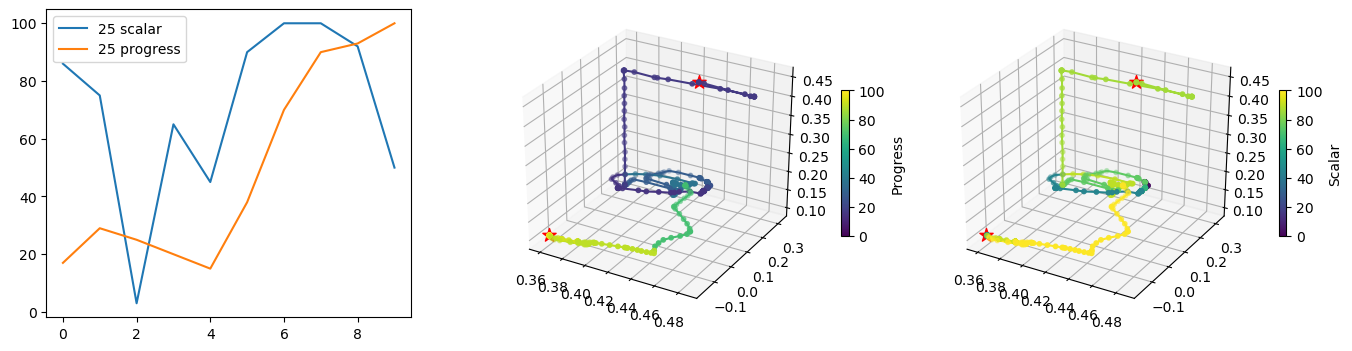

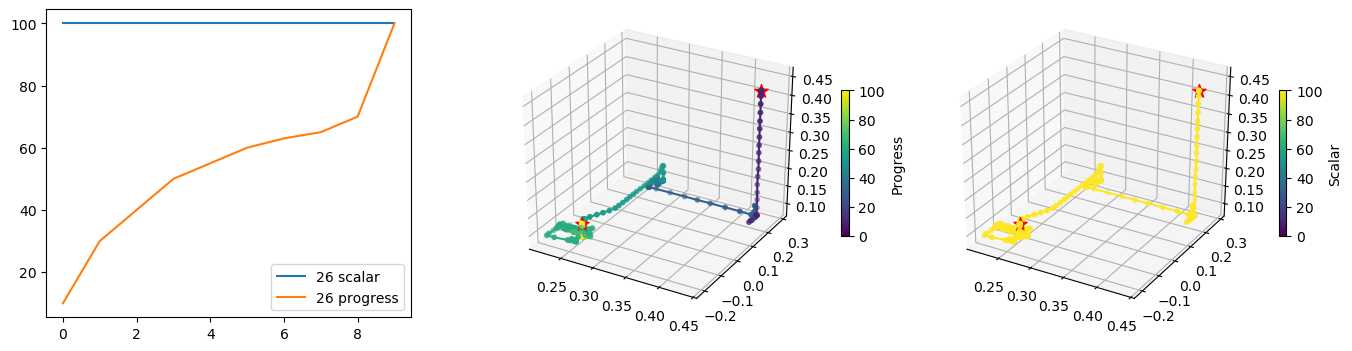

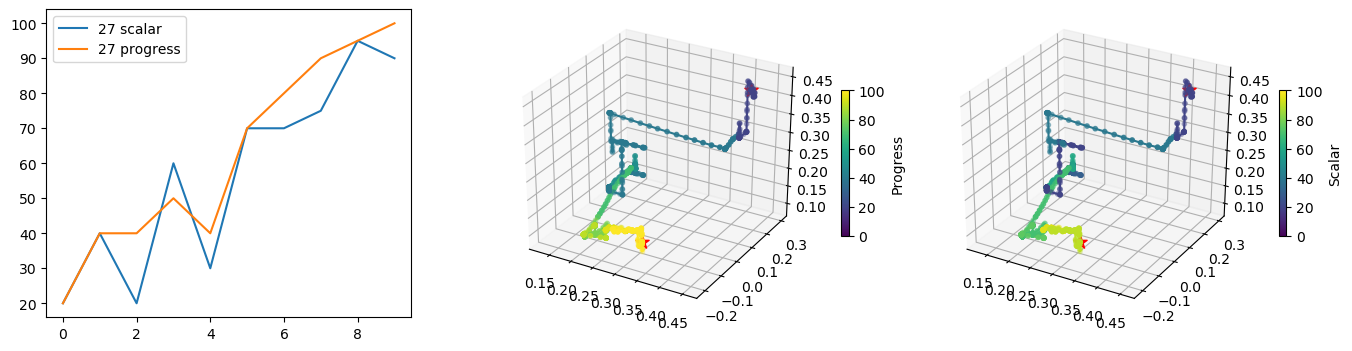

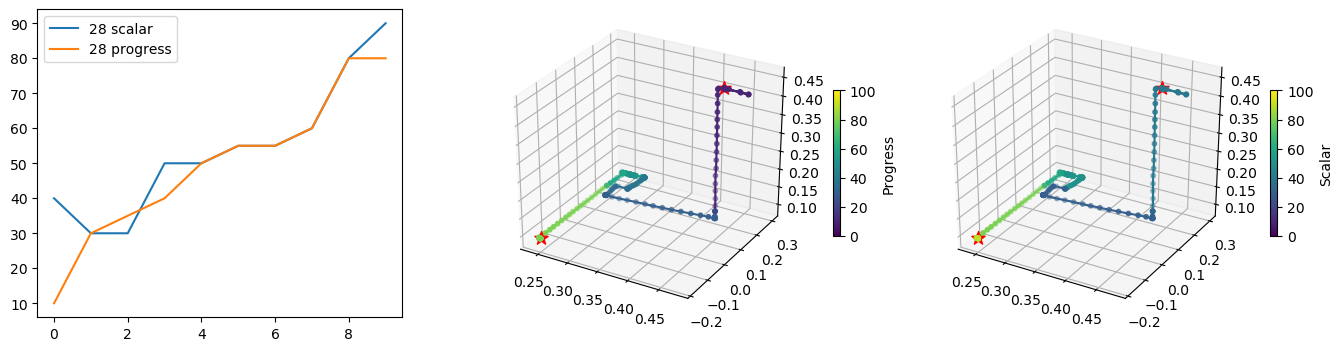

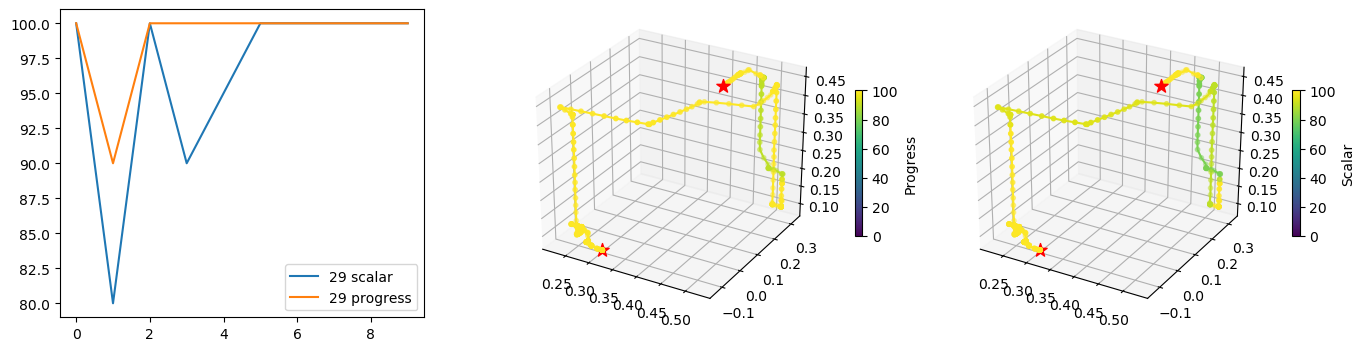

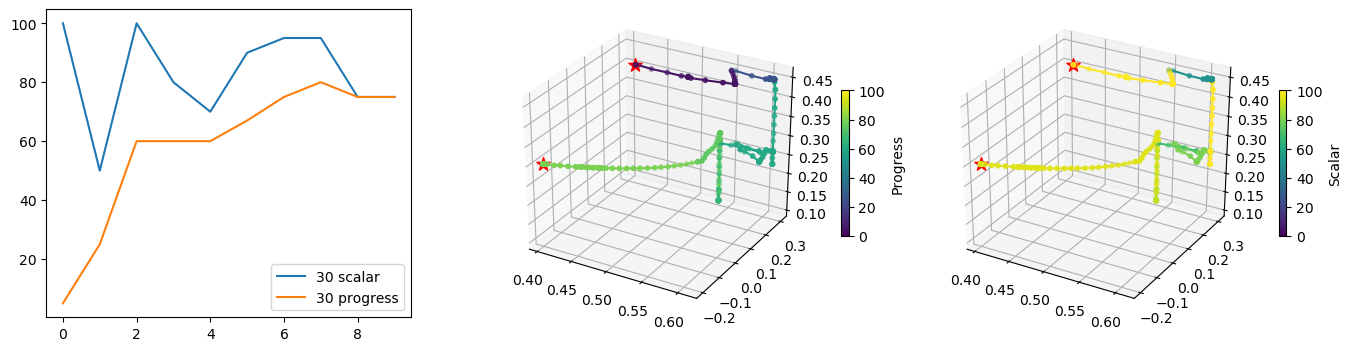

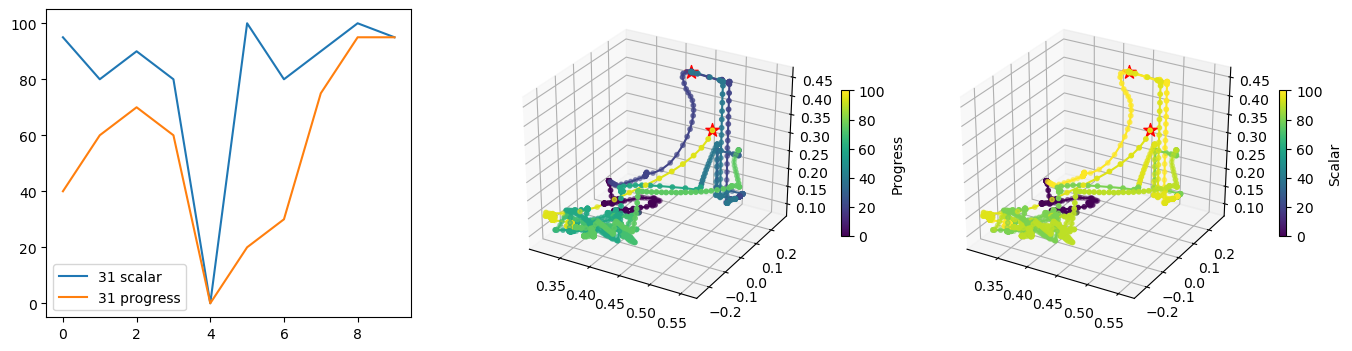

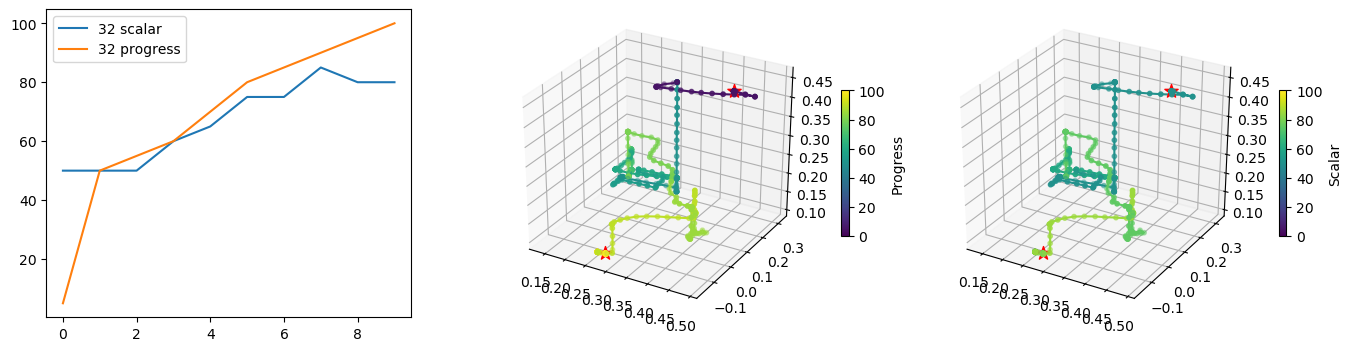

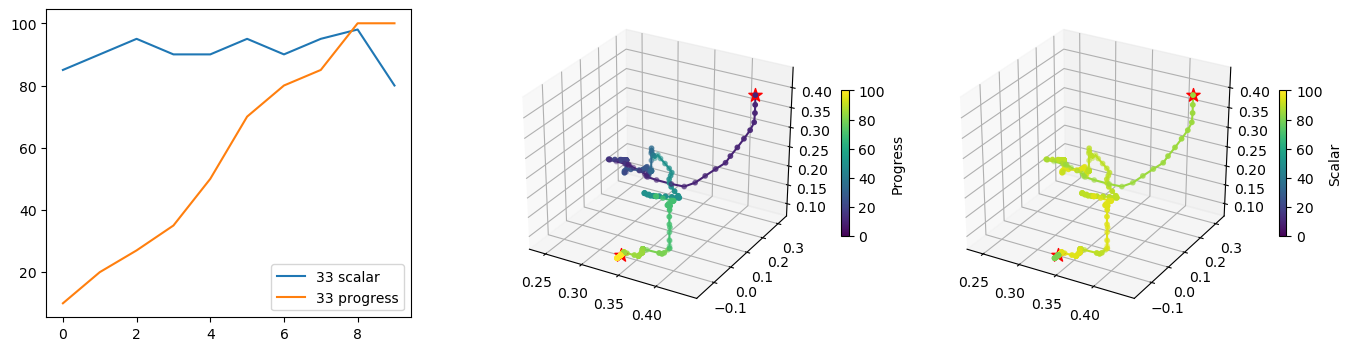

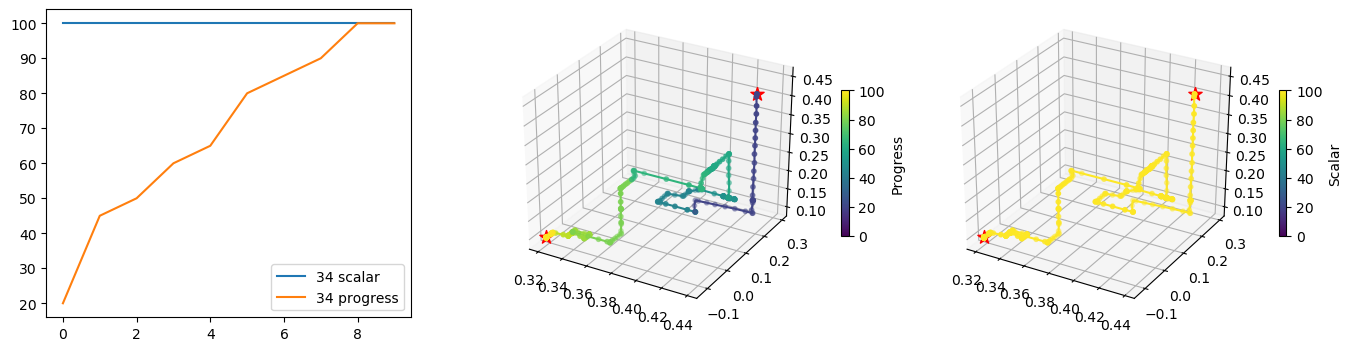

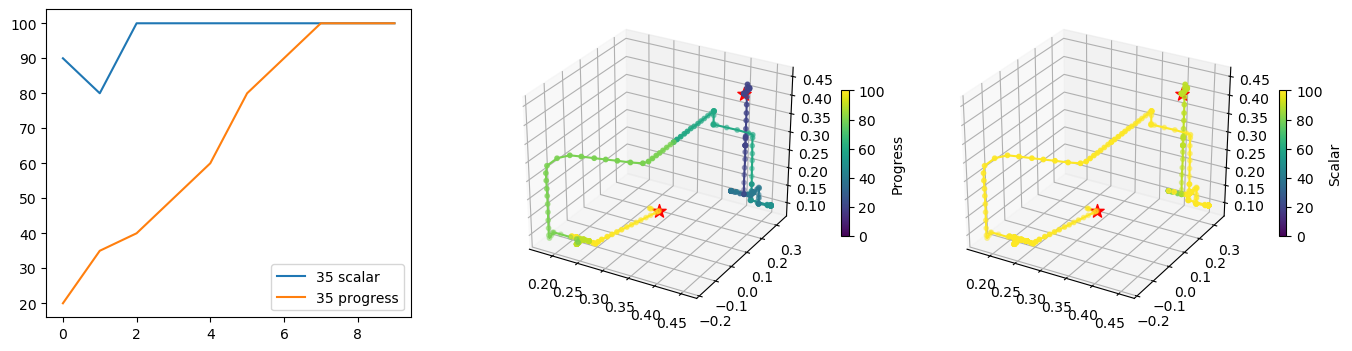

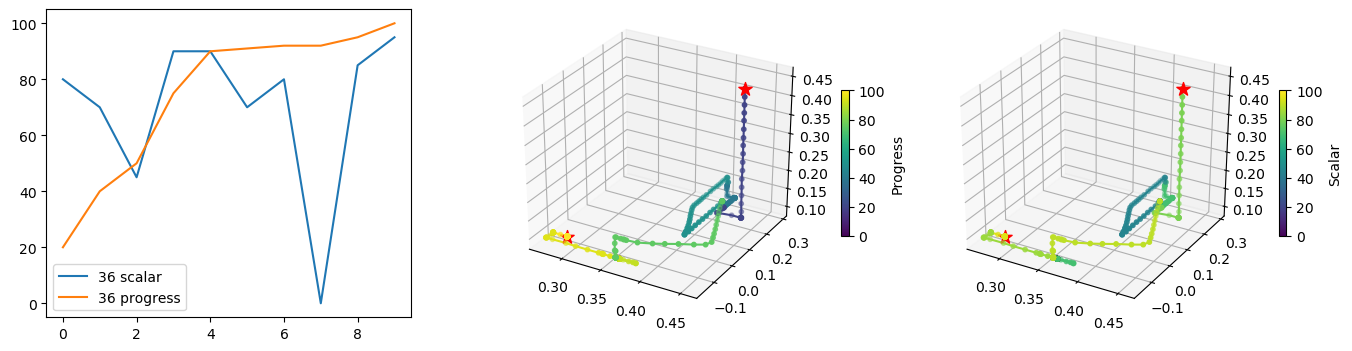

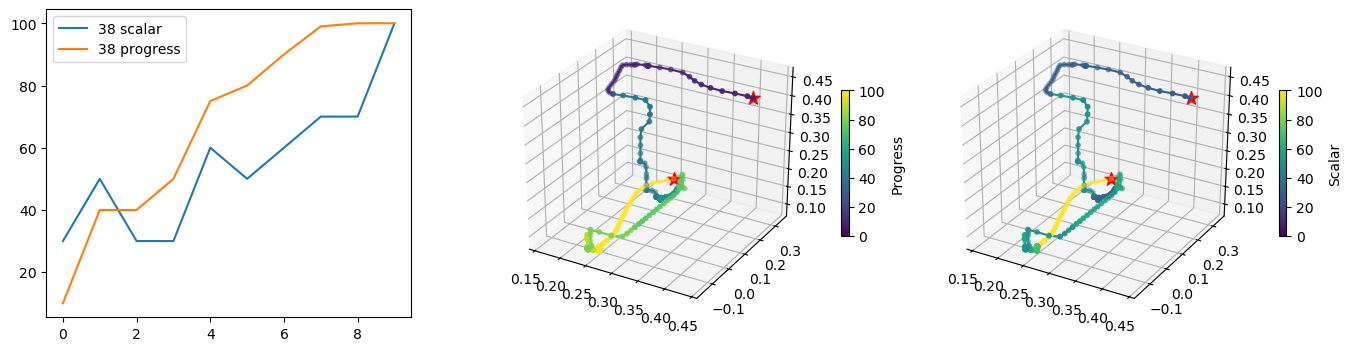

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

cmap = cm.viridis
# Assume 'trajectories', 'scalars', 'progresses', 'steps', and 'ind' are defined

for i, traj in enumerate(trajectories):
    fig = plt.figure(figsize=(16, 4))
    
    # First plot (2D)
    ax0 = fig.add_subplot(1, 3, 1)
    ax0.plot(scalars[i], label=str(ind[i]) + " scalar")
    ax0.plot(progresses[i], label=str(ind[i]) + " progress")
    ax0.legend()

    x = np.array([point[0] for point in traj])
    y = np.array([point[1] for point in traj])
    z = np.array([point[2] for point in traj])
    step = np.cumsum(steps[i])
    #append a zero to the beginning of the step
    step = np.insert(step, 0, 0)
    # Second plot (3D) for progress
    ax1 = fig.add_subplot(1, 3, 2, projection='3d')
    for k in range(len(step)-1):
        start, end = step[k], step[k+1]
        #print("info: ", progresses[i][k], end )
        # Directly use progress value for color mapping
        color = cmap(progresses[i][k] / 100.0)  # Divide by 100 to fit into 0-1 range for cmap
        ax1.plot(x[start:end+1], y[start:end+1], z[start:end+1], color=color)
        ax1.scatter(x[start:end+1], y[start:end+1], z[start:end+1], color=color, s=10)  # Plot each point
        

        # ax1.set_xlim(0.1, 0.6)
        # ax1.set_ylim(-0.3, 0.3)
        # ax1.set_zlim(0, 0.4)
    # mark the start and end of the trajectory with a star
        
    ax1.scatter(x[0], y[0], z[0], color='r', s=100, marker='*')
    ax1.scatter(x[-1], y[-1], z[-1], color='r', s=100, marker='*')

    # Adding color bar for progress
    sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 100))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax1, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Progress')

    # Third plot (3D) for scalar
    ax2 = fig.add_subplot(1, 3, 3, projection='3d')
    for k in range(len(step)-1):
        start, end = step[k], step[k+1]
        # Directly use scalar value for color mapping
        color = cmap(scalars[i][k] / 100.0)  # Divide by 100 to fit into 0-1 range for cmap
        ax2.plot(x[start:end+1], y[start:end+1], z[start:end+1], color=color)
        ax2.scatter(x[start:end+1], y[start:end+1], z[start:end+1], color=color, s=10)  # Plot each point
        # ax2.set_xlim(0.1, 0.6)
        # ax2.set_ylim(-0.3, 0.4)
        # ax2.set_zlim(0, 0.4)
    # mark the start and end of the trajectory with a star
    ax2.scatter(x[0], y[0], z[0], color='r', s=100, marker='*')
    ax2.scatter(x[-1], y[-1], z[-1], color='r', s=100, marker='*')
    # Adding color bar for scalar
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax2, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Scalar')

plt.show()
